# Introduction

#### In this Jupyter Notebook, I will be analysing the Iris dataset using various Python methods.
#### The following are tasks that I will complete in my analysis:
1. Import Libraries
2. Load the Dataset
    - I will load the Iris dataset using Pandas. 
3. Describe the Dataset
    - I will describe the Iris dataset and identify the feature names and species names.
4. Summarise the Features
    - I will write a script that outputs the summary of each variable into a single text file.
5. Explore the Dataset

    a. I will create a **histogram** for each feature. 
    
    b. I will create a **boxplot** for each feature. 
    
    c. I will create a **scatterplot** for each pair of features.

    d. I will calculate the **correlation coefficient** between the four features.
    
    e. I will create a **heatmap** to display the correlation coefficients of each feature with one another. 

    f. I will create a **pairplot** to display the relationship between all features with one another.
6. Conclusion

# 1. Import Libraries

In [34]:
# Dataframes
import pandas as pd

# Numpy
import numpy as np

# ScikitLearn: Machine Learning repository that contains sample datasets
import sklearn as skl 
from sklearn import datasets

# Plots
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Seaborn: Data visualization library based on matplotlib
import seaborn as sns

# Scipy: Scientific library for Python
import scipy

# 2. Load the Dataset

#### I downloaded the Iris dataset from the UC Irvine Machine Learning Repository 
###### [4] https://archive.ics.uci.edu/dataset/53/iris.
#### I added the dataset (iris.csv) to my repository (zoeharlowe/pands-project).
#### I researched the Pandas pd.read_csv() documentation to find out how to set column names 
###### [5] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [2]:
# Set column names
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Read in the dataset 
df = pd.read_csv("iris.csv", names = column_names)

# Display first 5 rows of the dataset
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### I also displayed the last 5 rows of the dataset.

###### (See GeeksForGeeks article on df.head() and df.tail() function: [6] https://www.geeksforgeeks.org/difference-between-pandas-head-tail-and-sample/)

In [3]:
# Display the last 5 rows of the dataset
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# 3. Describe the Dataset

#### I identified the feature names.

###### [7] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns
###### Microsoft Copilot autocompleted this code for me as I wasn't previously aware of the .values method

In [4]:
# Display feature names
column_names = df.columns.values
print(column_names)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


#### I identified the three class types using the np.unique() function 
###### [8] https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [5]:
# Find unique values in the species column.
unique_values = np.unique(df["species"])

print(unique_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### I used the describe() function to find the count, mean, std, max, min, and first and third interquartiles of the dataset for each feature.
###### [9] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [ ]:
# Display summary statistics of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 4. Summarise the Dataset

#### I created a text file (summary.txt) and used a for loop to write information about each feature into the text file.

#### I used an article on GeeksForGeeks to help me create the text file.
###### [10] https://www.geeksforgeeks.org/create-a-new-text-file-in-python/

#### Below you can see that I made a lambda function to find the number of features. I did this with the help of ChatGPT
###### [11] https://chatgpt.com/share/68023853-726c-8000-901f-72d720dfc9bf

In [7]:
# Create file
FILENAME = "summary.txt"

with open(FILENAME, 'w') as f:

    # Title
    f.write("Iris Dataset Summary\n")
    f.write("====================================\n\n")

    # Overall summary
    f.write("OVERALL SUMMARY\n")
    f.write(f"Shape of dataset: \t {df.shape} \n") # shape
    f.write(f"Number of species: \t {len(unique_values)} \n") # number of species

    # Number of features - I created a lambda function to count the number of features in each row
    float_count = df.apply(lambda row: sum(isinstance(x, float) for x in row), axis=1).iloc[0]
    f.write(f"Number of features:  {float_count} \n") # number of features
    
    f.write(f"Species names:\t\t {unique_values} \n") # species names
    f.write(f"Feature names:\t\t {column_names} \n") # variable names

#### Now that I have a general summary of the dataset, I want to talk about the variables in this dataset and give a summary of each one.

#### I used the df.describe() function again, converting the Panda series to a string using .to_string(). I used ChatGPT to help me with this and to explain to me that f.write only works with strings
###### [12] https://chatgpt.com/share/680b7005-0a00-8000-b664-43050f0d49e8)

In [ ]:
# Features summary
# Open file in append mode to avoid overwriting the previous content
SUMMARY_FILE = "summary.txt"
with open(SUMMARY_FILE, 'a') as f:
    # Sepal length
    f.write("\nSEPAL LENGTH SUMMARY\n")
    f.write(df["sepal_length"].describe().to_string() + "\n")

    # Sepal width
    f.write("\nSEPAL WIDTH SUMMARY\n")
    f.write(df["sepal_width"].describe().to_string() + "\n")

    # Petal length
    f.write("\nPETAL LENGTH SUMMARY\n")
    f.write(df["petal_length"].describe().to_string() + "\n")

    # Petal width
    f.write("\nPETAL WIDTH SUMMARY\n")
    f.write(df["petal_width"].describe().to_string() + "\n")

    # Species
    f.write("\nSPECIES SUMMARY\n")
    f.write(df["species"].describe().to_string() + "\n")

# 5. Explore the Dataset

#### I will now create various plots to analyse and explore this dataset. 
#### Before I do so, I used Numpy to create arrays to make it easier for me to plot each feature.
###### [13] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
#### I was going to use the .iloc[] function to index each class + feature but I found a more reliable way regardless of order of dataset using ChatGPT
###### [14] https://chatgpt.com/share/681a689e-af98-8000-b1fe-cc017fc24afa

In [9]:
# Sepal width
sepal_width = df["sepal_width"]
sepal_width = sepal_width.to_numpy()

# Sepal length
sepal_length = df["sepal_length"]
sepal_length = sepal_length.to_numpy()

# Petal width
petal_width = df["petal_width"]
petal_width = petal_width.to_numpy()

# Petal length
petal_length = df["petal_length"]
petal_length = petal_length.to_numpy()

# Species
species = df["species"]
species = species.to_numpy()

# I then created multiple series of numpy arrays for each species and each feature.
# I used pandas dataframe to filter the data by species
# Setosa sepal width
setosa_sepal_width = df[df["species"] == "Iris-setosa"]["sepal_width"].to_numpy()

# Versicolor sepal width
versicolor_sepal_width = df[df["species"] == "Iris-versicolor"]["sepal_width"].to_numpy()

# Virginica sepal width
virginica_sepal_width = df[df["species"] == "Iris-virginica"]["sepal_width"].to_numpy()

# Setosa sepal length
setosa_sepal_length = df[df["species"] == "Iris-setosa"]["sepal_length"].to_numpy()

# Versicolor sepal length
versicolor_sepal_length = df[df["species"] == "Iris-versicolor"]["sepal_length"].to_numpy()

# Virginica sepal length
virginica_sepal_length = df[df["species"] == "Iris-virginica"]["sepal_length"].to_numpy()

# Setosa petal width
setosa_petal_width = df[df["species"] == "Iris-setosa"]["petal_width"].to_numpy()

# Versicolor petal width
versicolor_petal_width = df[df["species"] == "Iris-versicolor"]["petal_width"].to_numpy()

# Virginica petal width
virginica_petal_width = df[df["species"] == "Iris-virginica"]["petal_width"].to_numpy()

# Setosa petal length
setosa_petal_length = df[df["species"] == "Iris-setosa"]["petal_length"].to_numpy()

# Versicolor petal length
versicolor_petal_length = df[df["species"] == "Iris-versicolor"]["petal_length"].to_numpy()

# Virginica petal length
virginica_petal_length = df[df["species"] == "Iris-virginica"]["petal_length"].to_numpy()


## a. Histogram
#### Using the Matplotlib plt.hist() function, I plotted five histograms - one for each feature/variable.

###### [15] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

### **Histogram displaying Sepal Width:**

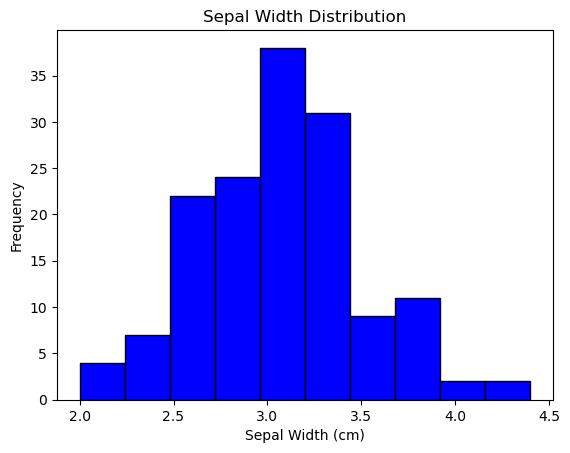

In [10]:
# Histogram of sepal width with set colour customisation and bin width
plt.hist(sepal_width, bins=10, color='blue', edgecolor='black')

# Add axis labels
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Sepal Width Distribution')

# Save the histogram to a file
plt.savefig("histogram_sepal_width.png")

# Show
plt.show()

#### The above histogram tells us that:
- The distribution of **sepal width** across all Iris flowers is fairly symmetrical but a bit skewed to the left.
- Most values of **sepal width** fall between 2.5cm and 3.5cm
- There are no major outliers.

### **Histogram displaying Sepal Length:**

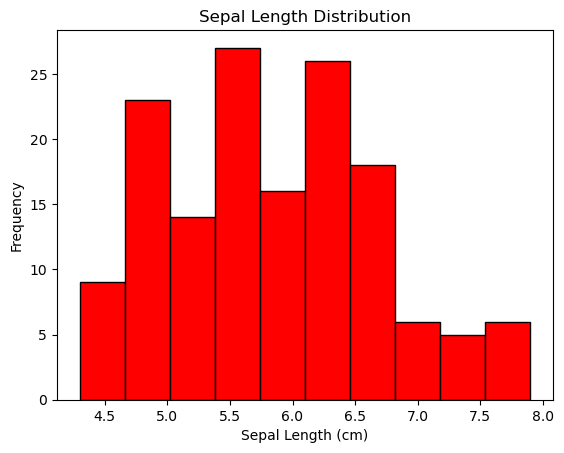

In [11]:
# Histogram of sepal length with set colour customisation and bin width
plt.hist(sepal_length, bins=10, color='red', edgecolor='black')

# Add axis labels
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Sepal Length Distribution')

# Save the histogram to a file
plt.savefig("histogram_sepal_length.png")

# Show
plt.show()


#### The above histogram tells us that:
- The distribution of **sepal length** across all Iris flowers is quite skewed to the left.
- Most values of **sepal length** fall between 5.0cm and 7.0cm
- There are no major outliers.

### **Histogram displaying Petal Width:**

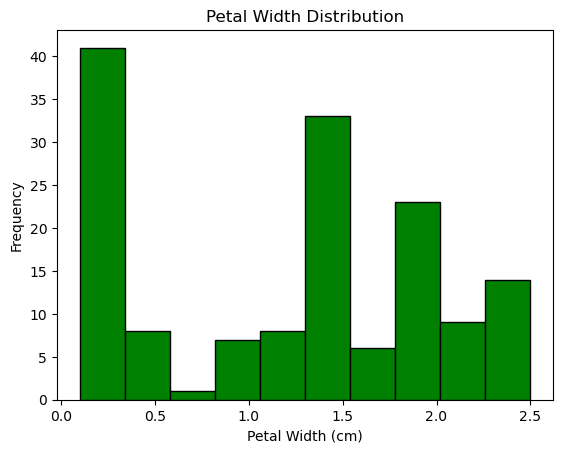

In [12]:
# Histogram of petal width with set colour customisation and bin width
plt.hist(petal_width, bins=10, color='green', edgecolor='black')

# Add axis labels
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Petal Width Distribution')

# Save the histogram to a file
plt.savefig("histogram_petal_width.png")

# Show
plt.show()

#### The above histogram tells us that:
- There are two clusters of **petal width** - one at around 0.2cm, and another between 1.3cm-2.0cm. This is likely due to a difference in species, and can be confirmed by looking at the KDE of petal width in the pairplot in part 'f' of this notebook.

### **Histogram displaying Petal Length:**

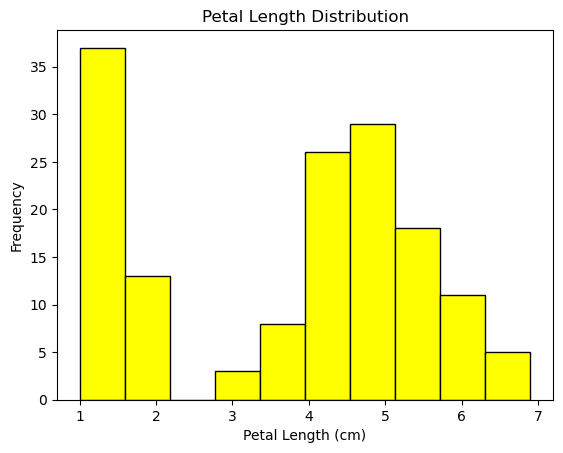

In [13]:
# Histogram of petal length with set colour customisation and bin width
plt.hist(petal_length, bins=10, color='yellow', edgecolor='black')

# Add axis labels
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Petal Length Distribution')

# Save the histogram to a file
plt.savefig("histogram_petal_length.png")

# Show
plt.show()

#### The above histogram tells us that:
- This is a bimodal distribution: There are two main clusters of datapoints for **petal length** - one cluster at around 1cm, and another between 4 and 6cm.
- Again, this histogram does not account for different species and a clearer picture can be seen in the KDE of petal length in the pairplot in part 'f' of this notebook.

###### Article about bimodal distribution: [16] https://www.statology.org/bimodal-distribution/

### **Histogram displaying Species:**

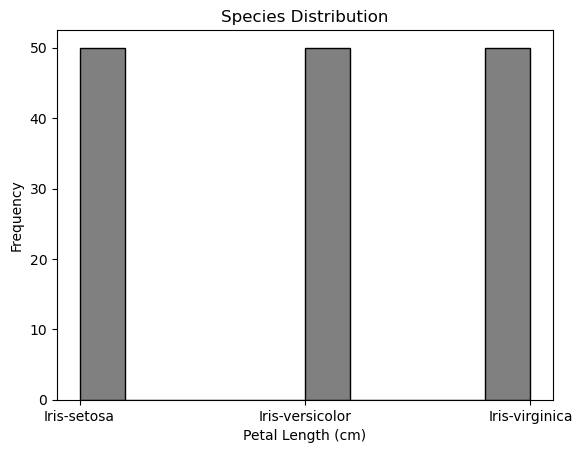

In [14]:
# Histogram of species with set colour customisation and bin width
plt.hist(species, bins=10, color='gray', edgecolor='black')

# Add axis labels
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

# Add title
plt.title('Species Distribution')

# Save the histogram to a file
plt.savefig("histogram_species.png")

# Show
plt.show()

#### This histogram tells us that:
- There are 3 species of Iris flower examined in this dataset - Setosa, Versicolor and Virginica.
- There are 50 samples of each species in this dataset.
- There are 150 samples total of Iris flower in this dataset.

## b. Boxplot

#### Using the plt.boxplot() function, I created box plots of the each feature for each of the three classes (Setosa, Versicolor and Virginica).
###### [17] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
#### Each graph displays the 3 classes of Iris flower, with each box all placed beside one another for easier comparison. 
###### [18] Information on multiple datasets in one boxplot: https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
##### I used ChatGPT for applying colours using for loops.
###### [19] https://chatgpt.com/share/68090395-151c-8000-b018-be5c812b4ee9

### **Boxplot displaying Sepal Width:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_28560\2087126562.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


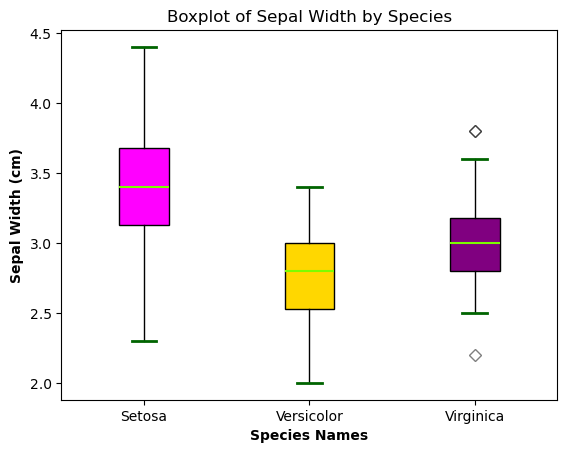

In [ ]:
# List of features to represent in boxplot
data_to_plot = [setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Sepal Width by Species")

# Axis labels
plt.ylabel("Sepal Width (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# For loop to apply colours
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_sepal_width.png")


#### This boxplot tells us that:
- For the Iris **Setosa** flower, the median **sepal width** lies at approximately 3.4cm. The minimum value is about 2.3cm and the maximum value about 4.4cm. The middle 50% of the data lies between around 3.1cm and 3.7cm.
- For the Iris **Versicolor** flower, the median **sepal width** lies at approximately 2.7cm. The minimum value is about 2.0cm and the maximum value about 3.4cm. The middle 50% of the data lies between around 2.5cm and 3.0cm.
- For the Iris **Virginica** flower, the median **sepal width** lies at approximately 3.0cm. The minimum value is about 2.5cm and the maximum value about 3.6cm. The middle 50% of the data lies between around 2.7cm and 3.2cm. There are two outliers: one at approximately 2.2cm and one at approximately 3.7cm.

###### [20] https://www.vrogue.co/post/understanding-boxplots-how-to-read-and-interpret-a-boxplot-built-in

### **Boxplot displaying Sepal Length:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_28560\3824969423.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


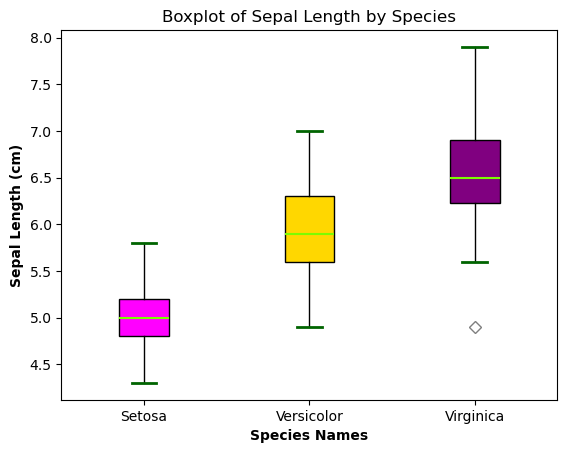

In [ ]:
# List of features to represent in boxplot
data_to_plot = [setosa_sepal_length, versicolor_sepal_length, virginica_sepal_length]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Sepal Length by Species")

# Axis labels
plt.ylabel("Sepal Length (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# For loop to apply colours
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_sepal_length.png")

# Show.
plt.show()

#### This boxplot tells us that:
- For the Iris **Setosa** flower, the median **sepal length** lies at approximately 5.0cm. The minimum value is about 4.3cm and the maximum value about 5.8cm. The middle 50% of the data lies between around 4.8cm and 5.2cm.
- For the Iris **Versicolor** flower, the median **sepal length** lies at approximately 2.7cm. The minimum value is about 4.9cm and the maximum value about 3.4cm. The middle 50% of the data lies between around 5.6cm and 6.3cm.
- For the Iris **Virginica** flower, the median **sepal length** lies at approximately 5.9cm. The minimum value is about 5.6cm and the maximum value about 7.1cm. The middle 50% of the data lies between around 6.3cm and 6.9cm. There is one outlier at approximately 5.0cm


### **Boxplot displaying Petal Width:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_28560\3726050615.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


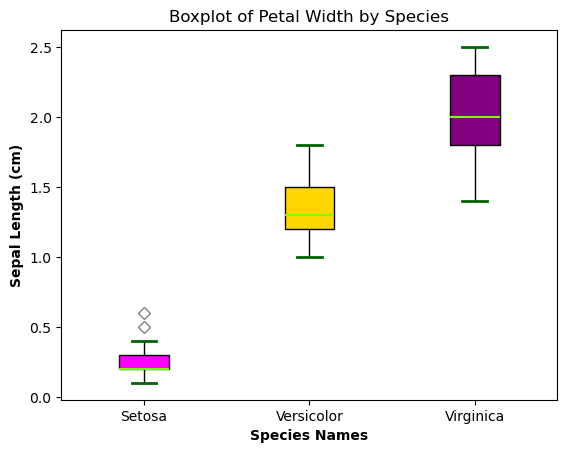

In [ ]:
# List of features to represent in boxplot
data_to_plot = [setosa_petal_width, versicolor_petal_width, virginica_petal_width]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Petal Width by Species")

# Axis labels
plt.ylabel("Sepal Length (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# For loop to apply colours
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_petal_width.png")

# Show.
plt.show()

#### This boxplot tells us that:
- For the Iris **Setosa** flower, the median **sepal length** lies at approximately 0.2cm. The minimum value is about 0.1cm and the maximum value about 0.4cm. The middle 50% of the data lies between around 0.2cm and 0.3cm. There are two outliers: one at approximately 0.5cm and one at approximately 0.6cm.
- For the Iris **Versicolor** flower, the median **sepal length** lies at approximately 1.3cm. The minimum value is about 1.0cm and the maximum value about 1.8cm. The middle 50% of the data lies between around 1.2cm and 1.5cm.
- For the Iris **Virginica** flower, the median **sepal length** lies at approximately 2.0cm. The minimum value is about 1.4cm and the maximum value about 2.5cm. The middle 50% of the data lies between around 1.7cm and 2.3cm. 


### **Boxplot displaying Petal Length:**

C:\Users\ZMH\AppData\Local\Temp\ipykernel_28560\838019535.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])


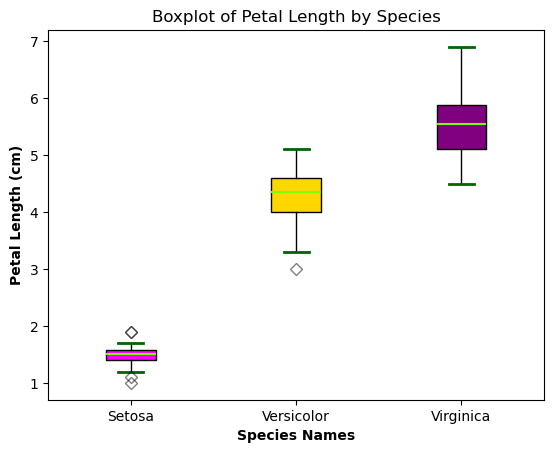

In [ ]:
# List of features to represent in boxplot
data_to_plot = [setosa_petal_length, versicolor_petal_length, virginica_petal_length]

# Create boxplot
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=["Setosa", "Versicolor", "Virginica"])

# Title
plt.title("Boxplot of Petal Length by Species")

# Axis labels
plt.ylabel("Petal Length (cm)", fontweight='bold')
plt.xlabel("Species Names", fontweight='bold')

# Box colours
# Set colours using a list
colors = ["magenta", "gold", "purple"]

# For loop to apply colours
# Changing colour of boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='darkblue',
              alpha = 0.5)

# Changing colour and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='darkgreen',
            linewidth = 2)
    
# Changing colour and linewidth of median
for median in bp['medians']:
    median.set(color ='lawngreen',
               linewidth = 1.5)
    
# Save the boxplot to a file
plt.savefig("boxplot_petal_length.png")

# Show.
plt.show()

#### This boxplot tells us that:
- For the Iris **Setosa** flower, the median **petal length** lies at approximately 1.5cm. The minimum value is about 1.2cm and the maximum value about 1.7cm. The middle 50% of the data lies between around 1.4cm and 1.6cm. There are three outliers: one at approximately 1.0cm, one at approximately 1.1cm and one at approximately 1.9cm.
- For the Iris **Versicolor** flower, the median **petal length** lies at approximately 4.4cm. The minimum value is about 3.3cm and the maximum value about 5.2cm. The middle 50% of the data lies between around 4.0cm and 4.6cm. There is one outlier at approximately 3.0cm.
- For the Iris **Virginica** flower, the median **petal length** lies at approximately 5.6cm. The minimum value is about 4.5cm and the maximum value about 7.0cm. The middle 50% of the data lies between around 5.1cm and 5.9cm. 


## c. Scatterplot

#### Using the function plt.scatter(), I created six scatter plots of the dataset to represent each pair of variables.
###### [21] https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#### The following are the species that appear in each scatter plot. They are colour coded to make for easier reading:
- Setosa: <span style="color: magenta;">magenta</span>
- Versicolor: <span style="color: gold;">gold</span>
- Virginica: <span style="color: purple;">purple</span>

### **Scatterplot displaying Sepal Length and Sepal Width:**

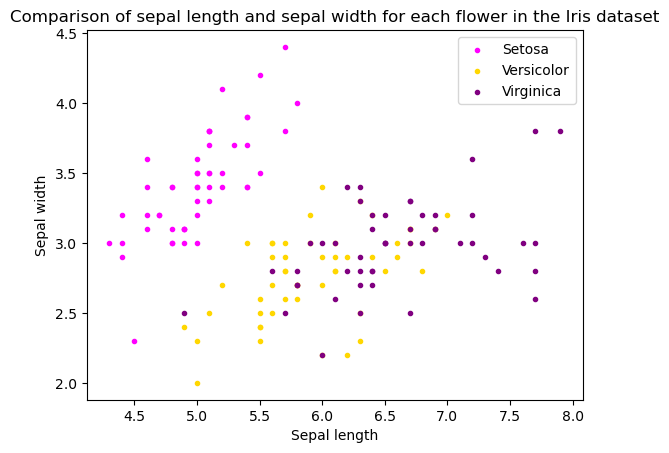

In [26]:
# Scatterplot with a different colour for each class type.
# I used the fig, ax method so I can recall the same scatterplot in later tasks.
fig1, ax = plt.subplots()
ax.scatter(setosa_sepal_length, setosa_sepal_width, marker = '.', c = 'magenta', label = "Setosa")
ax.scatter(versicolor_sepal_length, versicolor_sepal_width, marker = '.', c = 'gold', label = "Versicolor")
ax.scatter(virginica_sepal_length, virginica_sepal_width, marker = '.', c = 'purple', label = "Virginica")

# Title.
ax.set_title('Comparison of sepal length and sepal width for each flower in the Iris dataset')

# Axes labels.
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

ax.legend()

plt.savefig("scatterplot_sepal_length_sepal_width.png")

# Show.
plt.show()

### **Scatterplot displaying Sepal Length and Petal Length:**

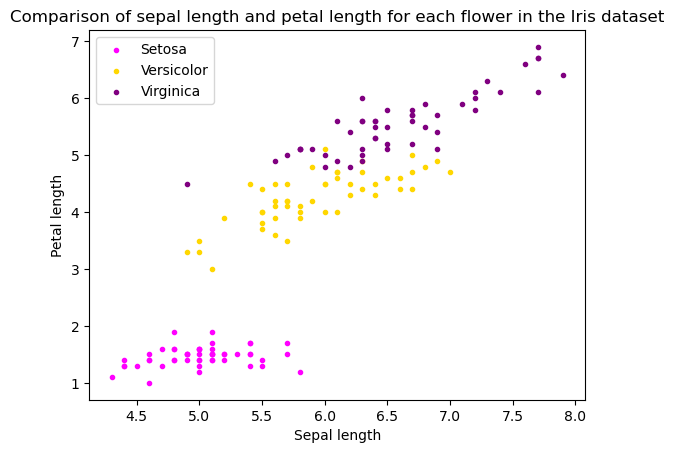

In [ ]:
# Scatterplot with a different colour for each class type.
# I used the fig, ax method so I can recall the same scatterplot in later tasks.
fig2, ax = plt.subplots()
ax.scatter(setosa_sepal_length, setosa_petal_length, marker = '.', c = 'magenta', label = "Setosa")
ax.scatter(versicolor_sepal_length, versicolor_petal_length, marker = '.', c = 'gold', label = "Versicolor")
ax.scatter(virginica_sepal_length, virginica_petal_length, marker = '.', c = 'purple', label = "Virginica")

# Title.
ax.set_title('Comparison of sepal length and petal length for each flower in the Iris dataset')

# Axes labels.
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal length')

ax.legend()

plt.savefig("scatterplot_sepal_length_petal_length.png")

# Show.
plt.show()

### **Scatterplot displaying Sepal Length and Petal Width:**

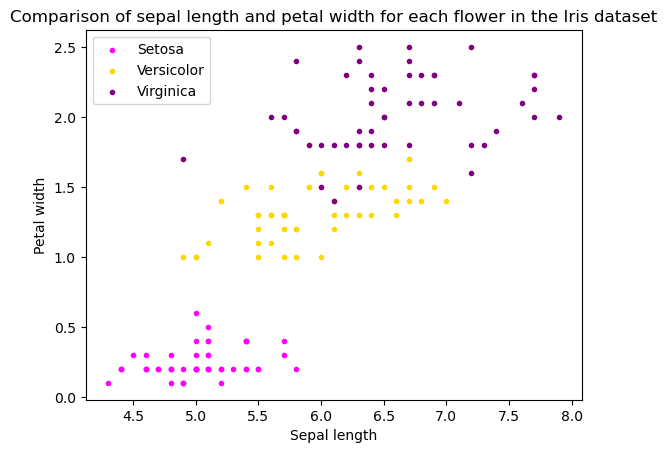

In [ ]:
# Scatterplot with a different colour for each class type.
# I used the fig, ax method so I can recall the same scatterplot in later tasks.
fig3, ax = plt.subplots()
ax.scatter(setosa_sepal_length, setosa_petal_width, marker = '.', c = 'magenta', label = "Setosa")
ax.scatter(versicolor_sepal_length, versicolor_petal_width, marker = '.', c = 'gold', label = "Versicolor")
ax.scatter(virginica_sepal_length, virginica_petal_width, marker = '.', c = 'purple', label = "Virginica")

# Title.
ax.set_title('Comparison of sepal length and petal width for each flower in the Iris dataset')

# Axes labels.
ax.set_xlabel('Sepal length')
ax.set_ylabel('Petal width')

ax.legend()

plt.savefig("scatterplot_sepal_length_petal_width.png")

# Show.
plt.show()

### **Scatterplot displaying Petal Length and Sepal Width:**

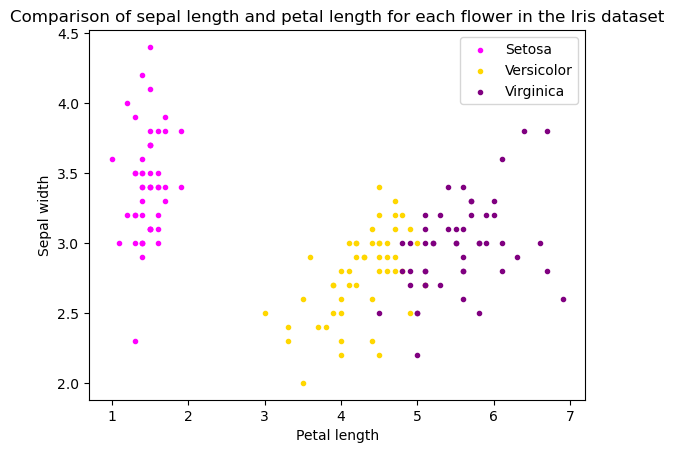

In [ ]:
# Scatterplot with a different colour for each class type.
# I used the fig, ax method so I can recall the same scatterplot in later tasks.
fig4, ax = plt.subplots()
ax.scatter(setosa_petal_length, setosa_sepal_width, marker = '.', c = 'magenta', label = "Setosa")
ax.scatter(versicolor_petal_length, versicolor_sepal_width, marker = '.', c = 'gold', label = "Versicolor")
ax.scatter(virginica_petal_length, virginica_sepal_width, marker = '.', c = 'purple', label = "Virginica")

# Title.
ax.set_title('Comparison of sepal length and petal length for each flower in the Iris dataset')

# Axes labels.
ax.set_xlabel('Petal length')
ax.set_ylabel('Sepal width')

ax.legend()

plt.savefig("scatterplot_petal_length_sepal_width.png")

# Show.
plt.show()

### **Scatterplot displaying Petal Length and Petal Width:**

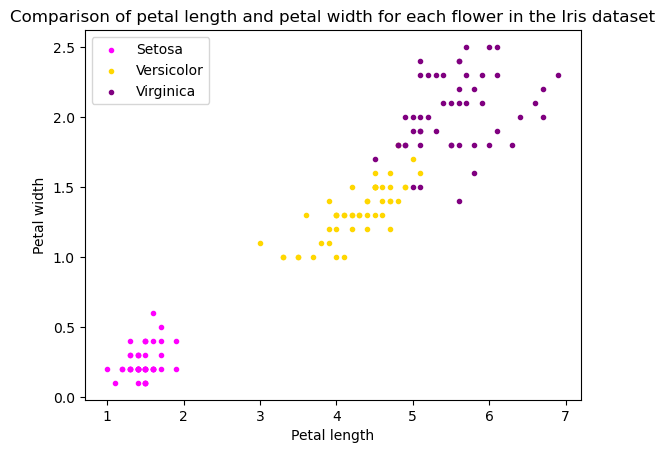

In [ ]:
# Scatterplot with a different colour for each class type.
# I used the fig, ax method so I can recall the same scatterplot in later tasks.
fig5, ax = plt.subplots()
ax.scatter(setosa_petal_length, setosa_petal_width, marker = '.', c = 'magenta', label = "Setosa")
ax.scatter(versicolor_petal_length, versicolor_petal_width, marker = '.', c = 'gold', label = "Versicolor")
ax.scatter(virginica_petal_length, virginica_petal_width, marker = '.', c = 'purple', label = "Virginica")

# Title.
ax.set_title('Comparison of petal length and petal width for each flower in the Iris dataset')

# Axes labels.
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')

ax.legend()

plt.savefig("scatterplot_petal_length_petal_width.png")

# Show.
plt.show()

### **Scatterplot displaying Sepal Width and Petal Width:**

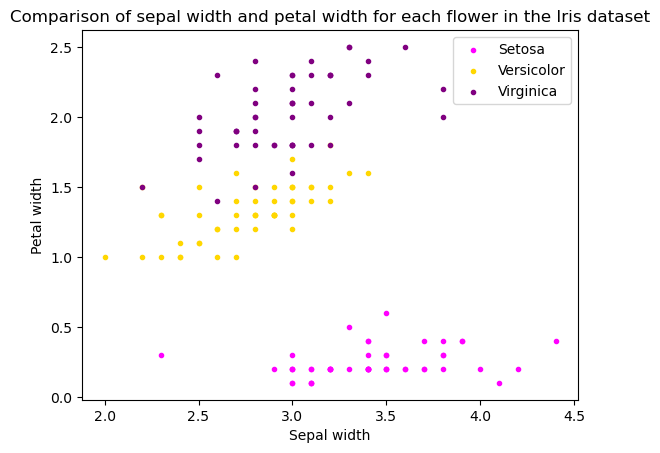

In [ ]:
# Scatterplot with a different colour for each class type.
# I used the fig, ax method so I can recall the same scatterplot in later tasks.
fig6, ax = plt.subplots()
ax.scatter(setosa_sepal_width, setosa_petal_width, marker = '.', c = 'magenta', label = "Setosa")
ax.scatter(versicolor_sepal_width, versicolor_petal_width, marker = '.', c = 'gold', label = "Versicolor")
ax.scatter(virginica_sepal_width, virginica_petal_width, marker = '.', c = 'purple', label = "Virginica")

# Title.
ax.set_title('Comparison of sepal width and petal width for each flower in the Iris dataset')

# Axes labels.
ax.set_xlabel('Sepal width')
ax.set_ylabel('Petal width')

ax.legend()

plt.savefig("scatterplot_sepal_width_petal_width.png")

# Show.
plt.show()

## d. Correlation Coefficient

#### Using the Pandas DataFrame.corr function, I found the correlation coefficients of each feature with one another. 
###### [22] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

#### 
- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables
###### [23] https://www.statology.org/correlation-in-python/

In [30]:
# Define the features which I will be finding the correlation coefficient of.
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Identify the correlation coefficient between all four features.
# This will return a correlation matrix.
correlation_matrix = df[features].corr()

print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


## e. Heatmap

#### Using matplotlib, I created a heatmap showing the correlation coefficients between all four features.
#### Heatmaps are colour-coded image plots, representing data that depends on two independent variables. ###### [24] https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
#### To create a clear, readable heatmap, I wanted to colour code the colourbar to display the strength of the correlation for both positive and negative.
#### I created my own custom colour map, using ChatGPT to find the codes for each colour and how to use the module LinearSegmentedColorMap correctly 
###### [25] https://chatgpt.com/share/67ffaf4d-5d08-8000-acf8-bd59f1760cbe
#### Then I annotated it to show the correlation coefficient (rounded to 2 decimal places) of each cell.

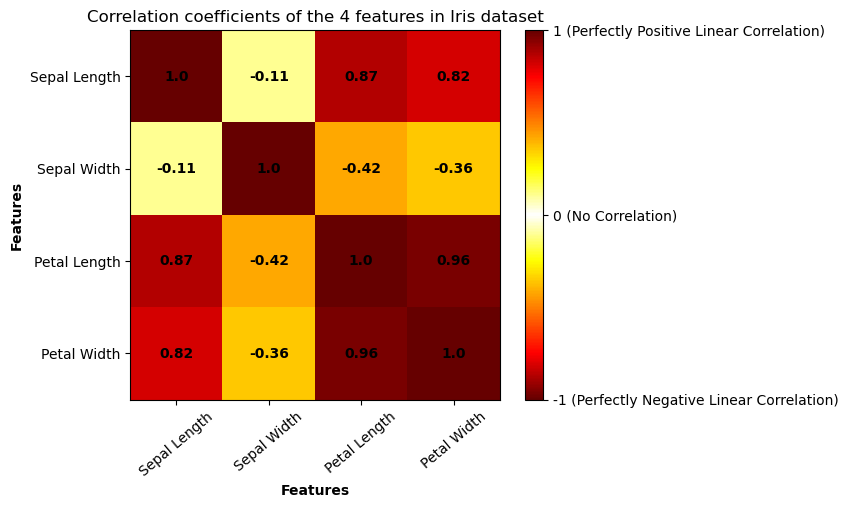

In [32]:
# Identify the features being compared in the heatmap.
features = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Define custom color sequence (dark red → red → orange → yellow → white → yellow → orange → red → dark red)
colors = [
    (0.4, 0, 0),   # dark red
    (1, 0, 0),     # red
    (1, 0.5, 0),   # orange
    (1, 1, 0),     # yellow
    (1, 1, 1),     # white
    (1, 1, 0),     # yellow
    (1, 0.5, 0),   # orange
    (1, 0, 0),     # red
    (0.4, 0, 0)    # dark red
]

# Give the colormap a name
cmap_name = 'cyclic_autumn'

# Create a colormap from the list of colors
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256) # N=256 for smooth gradient

# Create heatmap.
plt.imshow(correlation_matrix, cmap=cmap, vmin=-1, vmax=1) # Set colour scale from -1 to 1

# Add title
plt.title("Correlation coefficients of the 4 features in Iris dataset")

# Set tick labels
plt.xticks(range(len(features)),
           # Rotate the x-axis labels by 40 degrees for better visibility
           features, rotation=40) 
plt.yticks(range(len(features)), 
           features) 

# Annotate each cell using a for loop.
for i in range(len(features)):
    for j in range(len(features)):
        # Round each correlation coefficient to two decimal places.
        value = round(correlation_matrix.iloc[i, j], 2)
        # Format each annotation to be in the centre of the cell, coloured black and in bold.
        plt.text(j, i, str(value), ha='center', va='center', color='black', fontweight = 'bold')

# Set axes labels and format them in bold
plt.ylabel("Features", fontweight = 'bold')
plt.xlabel("Features", fontweight = 'bold')

# Add colourbar 
cbar = plt.colorbar(ticks=[-1, 0, 1]) 
# Set colourbar labels
cbar.ax.set_yticklabels(['-1 (Perfectly Negative Linear Correlation)', '0 (No Correlation)', '1 (Perfectly Positive Linear Correlation)'])

# Save the heatmap to a file
plt.savefig("heatmap_correlation.png")

# Show.
plt.show()

## f. Pairplot

#### Using the library Seaborn, I created a pairplot of the Iris dataset. 
###### [26] https://seaborn.pydata.org/generated/seaborn.pairplot.html
#### The pairplot() function is used "to plot multiple pairwise bivariate distributions in a dataset." ###### [27] https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
#### I watched this YouTube video to get an understanding of the best uses of Pairplot for my purposes
##### [28] https://www.youtube.com/watch?v=cpZExlOKFH4
#### I decided I wanted the diagonal to show a KDE (Kernel Density Estimation) instead of a histogram as I found it easier to read for this dataset.
#### The rest of the plots are scatterplots to show the relationship between each feature across the 3 species.

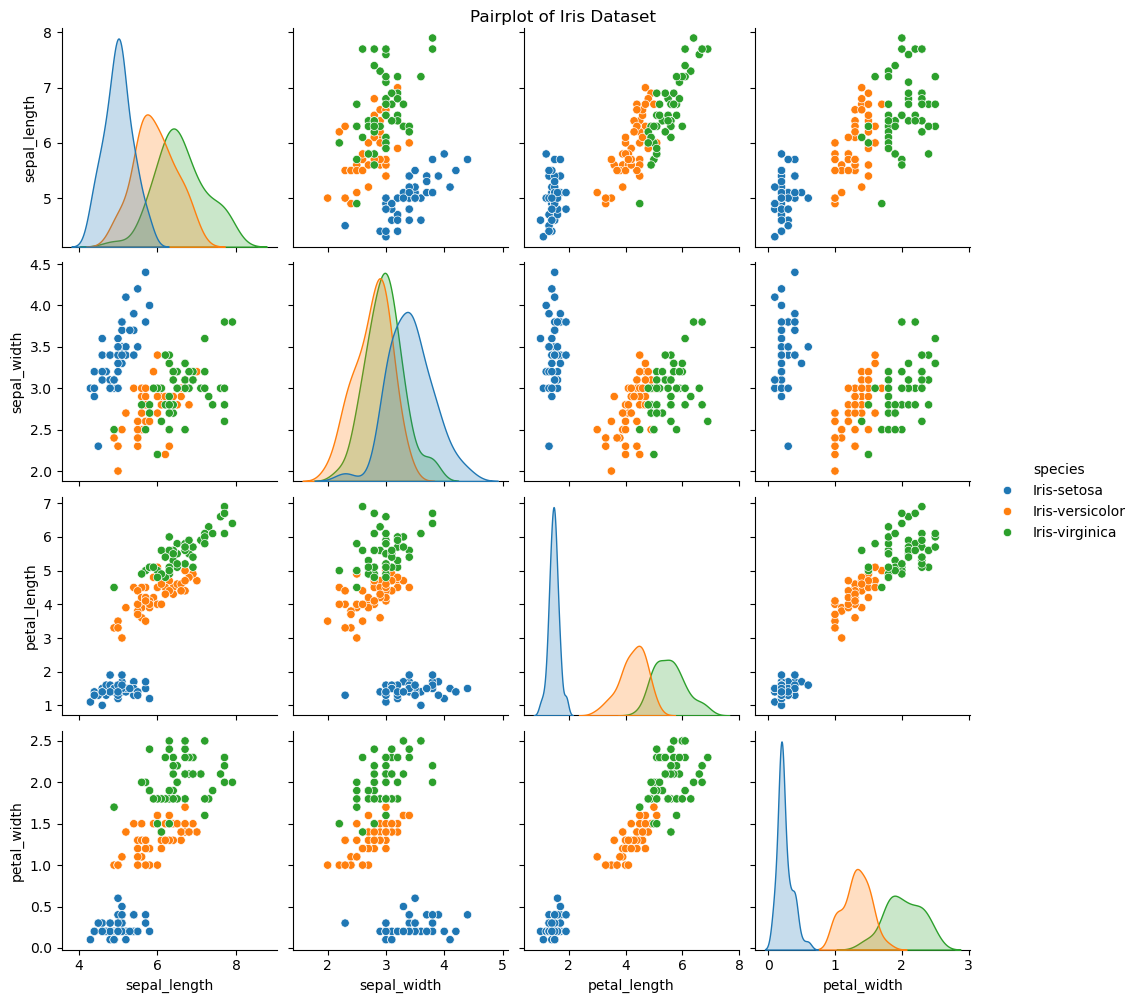

In [39]:
# Load the pairplot using Seaborn
# Plot colours to the species of Iris flower using the 'hue' argument
# Make diagonal plots KDEs instead of histograms
g = sns.pairplot(df, hue="species", diag_kind='kde')

# Add title
# Add some height to the title using the 'y' argument as it was covering some of the pairplot
g.figure.suptitle("Pairplot of Iris Dataset", y=1)

# Save the pairplot to a file
g.savefig("pairplot.png")

# Show.
plt.show()

#### This pairplot depicts the relationship between each feature with one another across the 3 species (Setosa, Versicolor, Virginica).
#### The scatterplots gives valuable information to the analyst of the correlation of each feature with the others. For example, we can see clearly from the above plots that petal length and petal width have a strong correlation across all 3 species.
#### The KDEs show the distribution of the data points for each feature. We can see that for sepal width, the 3 classes are all quite similar. For petal width however, it is clear that Setosa flowers have very different data points to Versicolor and Virginica, as we see that these flowers have narrow petals with very little variance, while Versicolor's petals are wider along with a wider distribution, and Virginica has the widest petals, as well as the most spread out data points.
#### I used this GeeksForGeeks article to help me interpret this pairplot
###### [29] https://www.geeksforgeeks.org/data-visualization-with-pairplot-seaborn-and-pandas/

# 6. Conclusion

#### From my analysis of the Iris dataset, I have drawn the following conclusions:
- There are clear distinctions between all three Iris flowers, although there exists some overlap when it comes to certain features.
- Iris Setosa is the most separable of the three, and is generally a smaller flower, with a significantly smaller sepal length, petal length and petal width then Iris Versicolor and Iris Virginica. 
- Interestingly, Iris Setosa does however have the largest sepal width overall, and this can be clearly seen in the KDE in the pairplot above. 
- Although Iris Versicolor and Iris Virginica are both quite similar in size, the Virginica species is slightly larger than Versicolor across every feature.
- Petal length and petal width are the two most informative and determining features when it comes to species classification. From looking at each scatterplot of the features, any plot showing petal length/width had clearer, more defined groups of data points across the three species.
- At 0.96, the strongest correlation existed between petal length and petal width. This indicates a very strong positive linear correlation between these two features.
- At -0.11, the weakest correlation existed between sepal length and sepal width. This tells us that knowing the sepal width for a given Iris flower would not be very helpful in predicting it's sepal length and vice versa.
- From the boxplots, we can see Virginica has the widest range of datapoints overall. 
- The boxplots also depict Versicolor as having the most consistent set of datapoints. Versicolor is also the only species with no outliers across any features. 
- The histograms show that sepal length has the most normal distribution out of all of the features. 
- Petal width and petal length represent a binomial distribution in the histograms.